<a href="https://colab.research.google.com/github/Sagargupta16/ML-Lab-Codes/blob/main/ML_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Q-1

img1 = Image.open("/content/cat.100.jpg").resize((100,100))
img2 = Image.open("/content/cat.101.jpg").resize((100,100))
img3 = Image.open("/content/cat.102.jpg").resize((100,100))
img4 = Image.open("/content/cat.103.jpg").resize((100,100))
img5 = Image.open("/content/cat.104.jpg").resize((100,100))
img6 = Image.open("/content/dog.100.jpg").resize((100,100))

Ans = []
Ans.append(np.array(img1).flatten())
Ans.append(np.array(img2).flatten())
Ans.append(np.array(img3).flatten())
Ans.append(np.array(img4).flatten())
Ans.append(np.array(img5).flatten())
Ans.append(np.array(img6).flatten())
mat = np.vstack(Ans)
print(mat)


[[221 222 217 ... 217 212 209]
 [ 71 253 254 ... 152 227 224]
 [148 134 121 ... 184 165 150]
 [153 157 156 ... 164 164 163]
 [121 129 108 ... 220 153 187]
 [194 183 177 ...  82  63  53]]


In [ ]:
# Q-2
import cv2
import numpy as np

def calculate_histogram(image):
    histogram = [np.zeros(256) for _ in range(3)]
    for c in range(3):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                pixel_value = image[i, j, c]
                histogram[c][pixel_value] += 1
    return histogram

def calculate_ratio(h1, h2):
    ratio = []
    for c in range(3):
        ratio_channel = np.minimum(h1[c], h2[c]).sum() / np.maximum(h1[c], h2[c]).sum()
        ratio.append(ratio_channel)
    return ratio

img1 = cv2.resize(cv2.imread("/content/cat.100.jpg"), (100, 100))
img2 = cv2.resize(cv2.imread("/content/cat.101.jpg"), (100, 100))

h1 = calculate_histogram(img1)
h2 = calculate_histogram(img2)

Ans = calculate_ratio(h1, h2)
print(Ans)
print(np.mean(Ans))


[0.359064963305246, 0.35666802333469, 0.18168389955686853]
0.29913896206560153


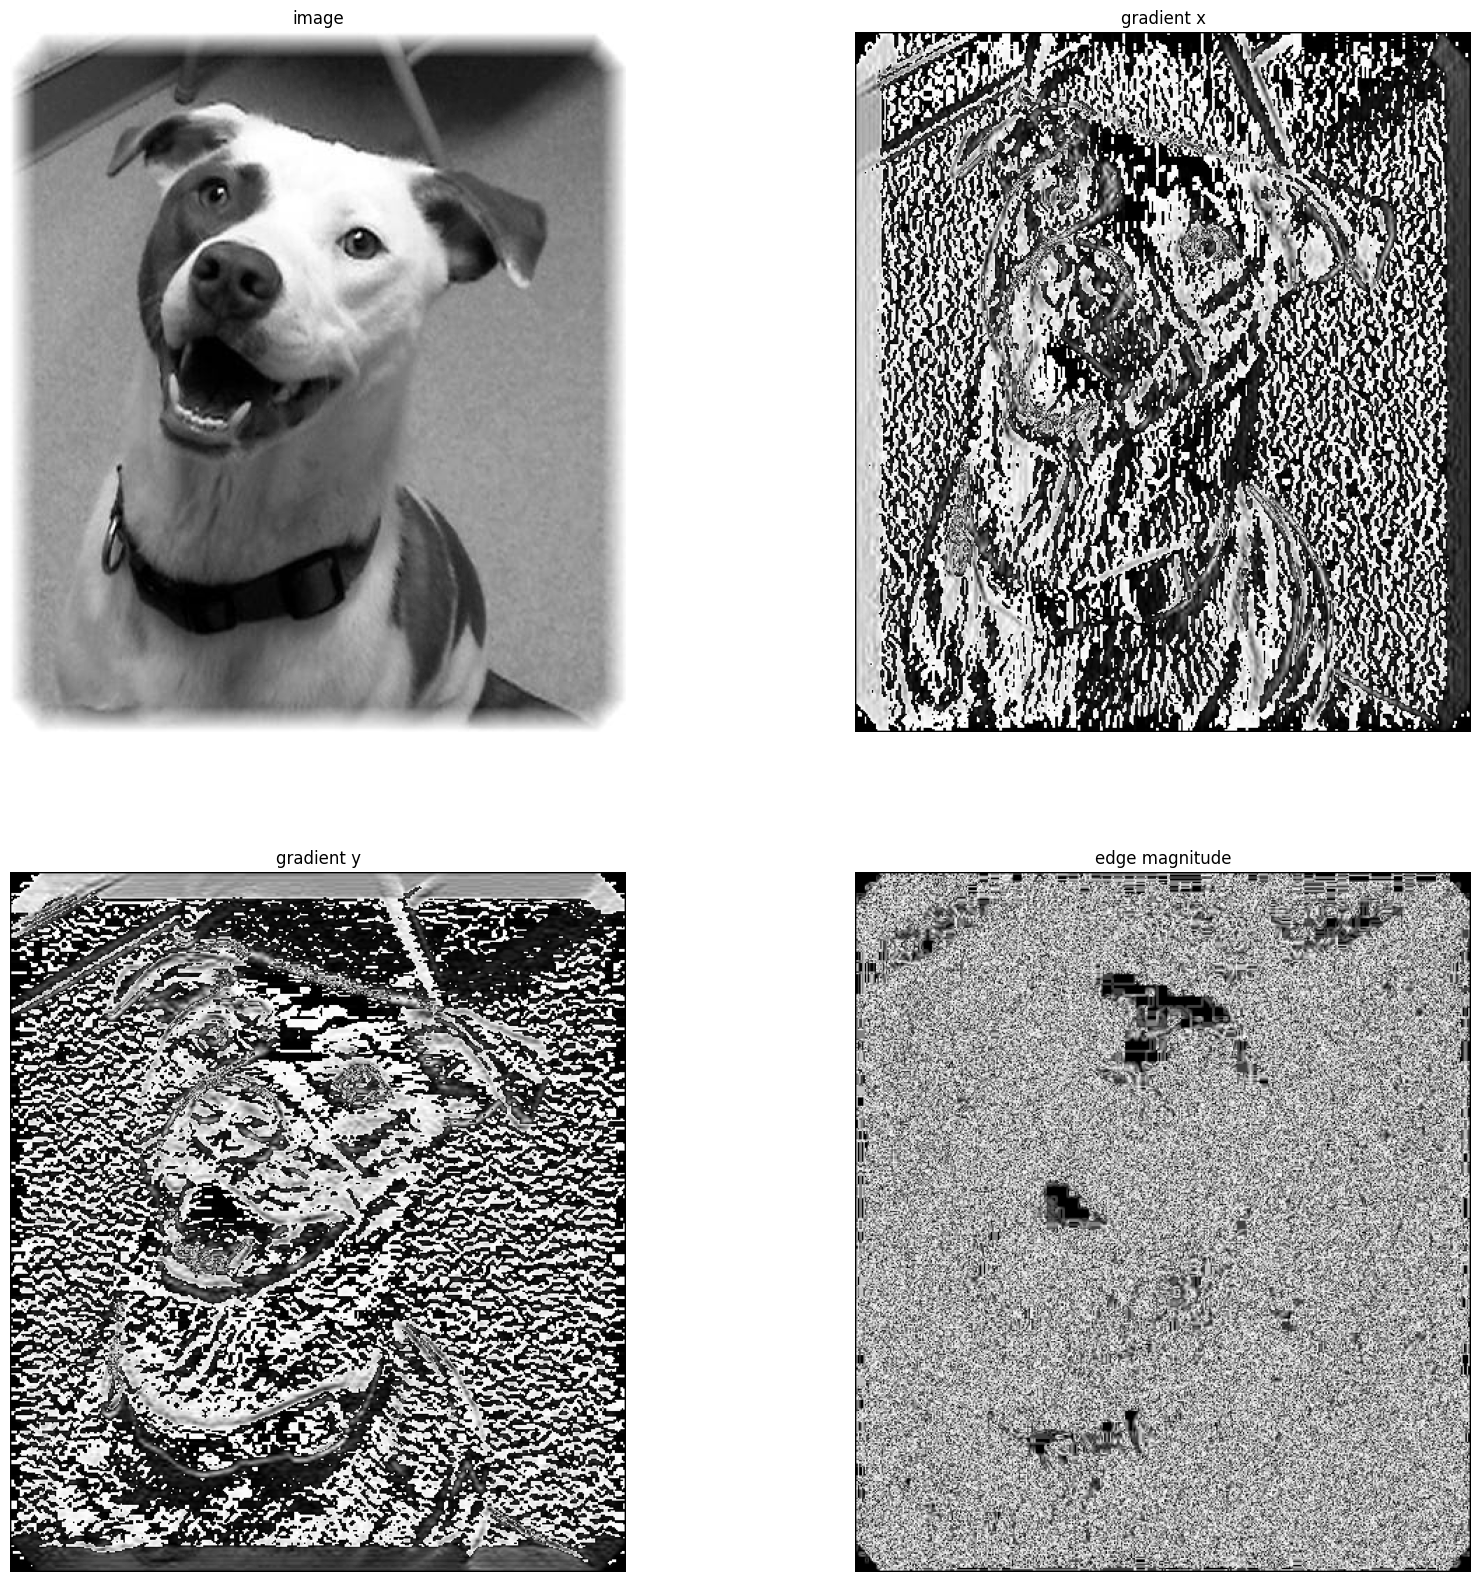

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/dog.101.jpg", cv2.IMREAD_GRAYSCALE)

fx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
fy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

gx = np.zeros_like(img)
gy = np.zeros_like(img)

for y in range(1, img.shape[0] - 1):
    for x in range(1, img.shape[1] - 1):
        gx[y, x] = np.sum(img[y - 1:y + 2, x - 1:x + 2] * fx)
        gy[y, x] = np.sum(img[y - 1:y + 2, x - 1:x + 2] * fy)

G = np.sqrt(gx**2 + gy**2)
dir = np.arctan2(gy, gx)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title("image")

fig.add_subplot(2, 2, 2)
plt.imshow(gx, cmap="gray")
plt.axis('off')
plt.title("gradient x")

fig.add_subplot(2, 2, 3)
plt.imshow(gy, cmap="gray")
plt.axis('off')
plt.title("gradient y")

fig.add_subplot(2, 2, 4)
plt.imshow(G, cmap="gray")
plt.axis('off')
plt.title("edge magnitude")

plt.show()


In [ ]:
# Q-4

def calculate_gradients(image):
    dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(dx**2 + dy**2)
    orientation = np.arctan2(dy, dx)
    return magnitude, orientation

def calculate_cell_histogram(orientation, magnitude, num_bins=9):
    histogram = np.zeros(num_bins)
    bin_width = 2 * np.pi / num_bins

    for i in range(orientation.shape[0]):
        for j in range(orientation.shape[1]):
            angle = orientation[i, j] % (2 * np.pi)
            weight = magnitude[i, j]
            bin_index = int(angle / bin_width)
            histogram[bin_index] += weight

    return histogram

image = cv2.imread('/content/cat.100.jpg', cv2.IMREAD_GRAYSCALE)
magnitude, orientation = calculate_gradients(image)
cell_histogram = calculate_cell_histogram(orientation, magnitude)
print("Cell Histogram:", cell_histogram)



Cell Histogram: [1142380.12158714  909985.46137992  877571.42612397  823902.13667015
 1095937.0353396   987653.79628839 1083417.21131774  854531.30398102
  929366.98584907]
